# DS4400 Final Project - Cleaning
## Mirah Gordon, Genny Jawor, Caterina Wang

This notebook is dedicated to loading data, cleaning data, doing preliminary exploration, feature extraction, and pre-processing the data to transform it into its final form. The output of this notebook will be a **csv file** that will be used in the accompanying **models** notebook, where all models and metrics are housed. 

Note: any cells with code that is completely commented out is there to show the process in which we obtained the data or other performed cleaning on the data but only needed to be run once and therefore is commented as to not interfere with future running of the kernel.

## Table of Contents
* [Loading Data](#LD)
* [Exploratory Data Analysis](#DA)
* [Data Cleaning](#DC)
* [NLP](#NLP)
* [Pre-Processing](#PP)
* [Exports](#Exports)

<a id='LD'></a>
### Loading Data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# load the drugs test csv as a df
# drugs_test = pd.read_csv('drugs_test.csv', encoding='utf-8')
# load the durgs train csv as a df
# drugs_train = pd.read_csv('drugs_train.csv', encoding='utf-8')

In [3]:
# combine test and train datasets into one complete dataframe
# drugs = pd.concat([drugs_test, drugs_train])
# drugs.to_csv('drugs.csv',index=False)

In [4]:
# load the combined drugs dataset
# drugs = pd.read_csv('drugs.csv')

In [5]:
# load the cleaned dataset to use in analysis and models
drugs = pd.read_csv('drugs_clean.csv')
drugs.drop(columns=['Unnamed: 0'], inplace=True)
drugs.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn's disease and has done very ...",8.0,"May 17, 2009",17
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


<a id='DA'></a>
### Exploratory Data Analysis

In [6]:
# find the number of unique conditions
unique_con = len(pd.unique(drugs['condition']))
print("Number of unique conditions: " + str(unique_con))

Number of unique conditions: 837


In [7]:
# find the number of unique drugs
unique_drug = len(pd.unique(drugs['drugName']))
print("Number of unique drugs: " + str(unique_drug))

Number of unique drugs: 3658


In [8]:
# list most common condition in descending order
c = Counter(drugs['condition'].tolist())
con_list = list(c.most_common())
con_list[:50]

[('Birth Control', 38436),
 ('Depression', 12164),
 ('Pain', 8245),
 ('Anxiety', 7812),
 ('Acne', 7435),
 ('Bipolar Disorde', 5604),
 ('Insomnia', 4904),
 ('Weight Loss', 4857),
 ('Obesity', 4757),
 ('ADHD', 4509),
 ('Diabetes, Type 2', 3362),
 ('Emergency Contraception', 3290),
 ('High Blood Pressure', 3104),
 ('Vaginal Yeast Infection', 3085),
 ('Abnormal Uterine Bleeding', 2744),
 ('Bowel Preparation', 2498),
 ('Smoking Cessation', 2440),
 ('ibromyalgia', 2370),
 ('Migraine', 2277),
 ('Anxiety and Stress', 2236),
 ('Major Depressive Disorde', 2131),
 ('Constipation', 2120),
 ('Chronic Pain', 1940),
 ('Panic Disorde', 1932),
 ('Migraine Prevention', 1867),
 ('Urinary Tract Infection', 1747),
 ('Muscle Spasm', 1631),
 ('Osteoarthritis', 1626),
 ('Generalized Anxiety Disorde', 1542),
 ('Opiate Dependence', 1477),
 ('Erectile Dysfunction', 1467),
 ('Irritable Bowel Syndrome', 1339),
 ('Allergic Rhinitis', 1323),
 ('Rheumatoid Arthritis', 1315),
 ('Bacterial Infection', 1252),
 ('Cough',

In [9]:
# find the 10 top conditions based on number of occurences in the data
top_10 = con_list[:10]
total_rows = 0
for con in top_10:
    con_count = con[1]
    total_rows += con_count

top_10 = dict(top_10)
print(top_10)

{'Birth Control': 38436, 'Depression': 12164, 'Pain': 8245, 'Anxiety': 7812, 'Acne': 7435, 'Bipolar Disorde': 5604, 'Insomnia': 4904, 'Weight Loss': 4857, 'Obesity': 4757, 'ADHD': 4509}


In [10]:
# filter the dataset to include only the top conditions
top_10_name = list(top_10.keys())
top_drugs = drugs[drugs['condition'].isin(top_10_name)]

top_drugs.head()

,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"""I've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4
6,Copper,Birth Control,"""I've had the copper coil for about 3 months n...",6.0,"June 6, 2016",1
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2.0,"April 16, 2011",3


In [11]:
# find the number of unique drugs for 10 top conditions
unique_drugs = np.unique(top_drugs['drugName'])
print("Number of unique drugs within the top 10 conditions: ", len(unique_drugs))

Number of unique drugs within the top 10 conditions:  815


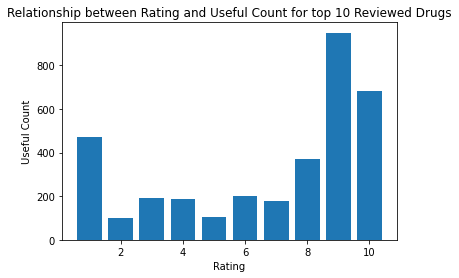

In [12]:
# graph relationship between rating and useful count 
plt.bar(top_drugs['rating'][:10000], top_drugs['usefulCount'][:10000])
plt.xlabel("Rating")
plt.ylabel("Useful Count")
plt.title("Relationship between Rating and Useful Count for top 10 Reviewed Drugs")
plt.show()

<a id='DC'></a>
### Data Cleaning

In [13]:
# replace characters encoded improperly in dataframe with utf-8 coding 
# for index, row in drugs.iterrows():
    # row['review'] = row['review'].replace("&#039;", "'").replace("&amp;", "&").replace("&quot;", '"').replace("&rsquo;", "'").replace("&lt;", "<").replace("&gt;", ">")
    # drugs.at[index,'review'] = row['review']

In [14]:
# save the cleaned drugs df as a new csv
# drugs.to_csv('drugs_clean.csv',index=False)

In [15]:
# drop any rows that </span> as condition 
# for index, row in drugs_clean.iterrows():
    # if "</span>" in str(row['condition']):
        # drugs_clean.drop(index, inplace=True)

In [16]:
# save the final cleaned df as a csv copy 
# drugs_clean.to_csv('drugs_clean', index=False)

<a id='NLP'></a>
### Natural Language Processing

In [17]:
# nltk imports
import nltk
import re
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')
set_stopwords = set(stopwords.words('english'))
set_stopwords.update(["i've", '"'])
print(set_stopwords)

{'into', "i've", "you'd", 'own', 'those', 'isn', 'then', 'above', 'were', 'through', "hadn't", 'them', 'a', 'here', 'be', 'just', 'between', 'can', 'down', 'out', 'haven', 'again', 'couldn', 'yourself', 've', 'at', 't', 'being', 'because', 'against', 'during', 'or', '"', 'm', 'are', "should've", 're', 'shouldn', 'himself', 'such', 'other', 'our', 'in', 'he', 'nor', "you've", 'she', 'theirs', 'what', 'too', 'll', 'after', "shan't", 'they', 'how', 'doing', 'mustn', 'doesn', 'to', 'the', 'further', 'now', "she's", 'yours', 'with', 'so', "weren't", 'him', 'had', 'wasn', 'these', 'o', "aren't", 'same', 'ourselves', 'has', 'both', 'than', 'any', 'not', 'hasn', 'very', 'most', 'needn', 'for', 'only', 'won', "that'll", 'few', "wasn't", 'her', 'ours', 'that', 'weren', 'under', 'why', 'did', 'from', 'their', 'no', 'of', 'ma', 'don', 'until', 'where', 'having', 'd', 'some', "doesn't", 'am', 'was', "you're", 'my', 'themselves', 'as', 'when', 'but', 'about', 'have', 'its', 'will', 'shan', "won't", 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mirahgordon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirahgordon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mirahgordon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# remove stopwords from the review text
top_drugs['review'] = top_drugs['review'].apply(lambda x: (" ").join([word for word in re.split(' |"', x) if not word.lower() in set_stopwords]))

top_drugs.head()

<ipython-input-18-05e92bdc2eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['review'] = top_drugs['review'].apply(lambda x: (" ").join([word for word in re.split(' |"', x) if not word.lower() in set_stopwords]))


,drugName,condition,review,rating,date,usefulCount
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",10.0,"February 28, 2012",22
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",9.0,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,9.0,"October 22, 2015",4
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,6.0,"June 6, 2016",1
9,Levora,Birth Control,pill almost two years. work far getting pregn...,2.0,"April 16, 2011",3


In [19]:
# run sentiment analysis on the review text and calculate the polarity score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound_list = []
for index, row in top_drugs.iterrows():
    review = row['review']
    # save the composite score to the list
    compound = sia.polarity_scores(review)['compound']
    compound_list.append(compound)

In [20]:
# add new column for the compound score 
top_drugs['compound'] = compound_list

<ipython-input-20-b6becc49e3d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['compound'] = compound_list


In [21]:
"""
Function to convert the compound score so it is standardized between 0 and 1 for the Naive Bayes classifier
"""
def convert_compound(row):
    if row['compound'] > 0.05:
        return 1
    elif row['compound'] >= -0.05 and row['compound'] <= 0.05:
        return 0.5
    else:
        return 0
    
# convert compound score
top_drugs['compound'] = top_drugs.apply(convert_compound, axis=1)

<ipython-input-21-cb5405bd136f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['compound'] = top_drugs.apply(convert_compound, axis=1)


In [22]:
"""
Function to mark a drug as effective or not, dependent on the user rating
"""
def convert_rating(row):
    if row['rating'] > 5:
        return 1
    else: 
        return 0

# apply the effective drug function to add a new column for effectiveness
top_drugs['rating_binary'] = top_drugs.apply(convert_rating, axis=1)

<ipython-input-22-fc959edcbb56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['rating_binary'] = top_drugs.apply(convert_rating, axis=1)


In [23]:
"""
Function to count the number of words in a review
"""
def count_words(text):
    return len(text.split())

# apply the word count function
top_drugs['word_count'] = top_drugs["review"].apply(lambda x:count_words(x))

<ipython-input-23-4531503d46e0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['word_count'] = top_drugs["review"].apply(lambda x:count_words(x))


In [24]:
"""
Function to count the number of characters in a review
"""
def count_chars(text):
    return sum(len(word) for word in str(text).split(" "))

# apply the character count function
top_drugs['char_count'] = top_drugs["review"].apply(lambda x: count_chars(x))

<ipython-input-24-9977ecaa4cd9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_drugs['char_count'] = top_drugs["review"].apply(lambda x: count_chars(x))


In [25]:
top_drugs.head()

,drugName,condition,review,rating,date,usefulCount,compound,rating_binary,word_count,char_count
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",10.0,"February 28, 2012",22,1.0,1,39,272
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",9.0,"March 5, 2017",35,1.0,1,67,395
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,9.0,"October 22, 2015",4,1.0,1,67,370
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,6.0,"June 6, 2016",1,0.0,1,59,316
9,Levora,Birth Control,pill almost two years. work far getting pregn...,2.0,"April 16, 2011",3,0.0,0,45,244


<a id='PP'></a>
### Pre-Processing

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [27]:
# make a copy of the top drugs dataframe
preprocessed_data = top_drugs.copy()

preprocessed_data.head()

,drugName,condition,review,rating,date,usefulCount,compound,rating_binary,word_count,char_count
0,Mirtazapine,Depression,"tried antidepressants years (citalopram, fluo...",10.0,"February 28, 2012",22,1.0,1,39,272
3,Contrave,Weight Loss,"Contrave combines drugs used alcohol, smoking...",9.0,"March 5, 2017",35,1.0,1,67,395
4,Cyclafem 1 / 35,Birth Control,birth control one cycle. reading reviews type...,9.0,"October 22, 2015",4,1.0,1,67,370
6,Copper,Birth Control,copper coil 3 months now. really excited thou...,6.0,"June 6, 2016",1,0.0,1,59,316
9,Levora,Birth Control,pill almost two years. work far getting pregn...,2.0,"April 16, 2011",3,0.0,0,45,244


In [28]:
import collections
# remove single instances of drugs from the preprocessed data 
singles = preprocessed_data['drugName']
single = collections.Counter(singles)
min_threshold = 1
ones = {x: count for x, count in single.items() if count <= min_threshold}
print(len(ones))
one_keys = list(ones.keys())
preprocessed_data = preprocessed_data[~preprocessed_data['drugName'].isin(one_keys)]

121


In [29]:
# fit the condition to the label encoder 
le.fit(preprocessed_data['condition'])
numerical_condition = le.transform(preprocessed_data['condition'])
# define numerical condition as transformation of encoder 
preprocessed_data['numericalCondition'] = numerical_condition
# fit the drug name to the label encoder 
le.fit(preprocessed_data['drugName'])
numerical_drug_name = le.transform(preprocessed_data['drugName'])
# define numerical drug name as transformation of encoder 
preprocessed_data['numericalDrugName'] = numerical_drug_name
# fit the compound to the label encoder 
le.fit(preprocessed_data['compound'])
compound_class = le.transform(preprocessed_data['compound'])
# define compound as transformation of encoder 
preprocessed_data['compound'] = compound_class
# fit the rating to the label encoder 
le.fit(preprocessed_data['rating'])
rating_class = le.transform(preprocessed_data['rating'])
# define rating as transformation of encoder 
preprocessed_data['rating'] = rating_class

In [30]:
# make a copy of the preprocessed data to use for binary tasks and naive bayes
preprocessed_data_binary = preprocessed_data.copy()
preprocessed_data_binary_nb = preprocessed_data.copy()
preprocessed_data_nb = preprocessed_data.copy()

# drop unnecessary columns 
preprocessed_data.drop(columns=['drugName', 'condition', 'review', 'date', 'rating_binary'], inplace=True)
preprocessed_data_nb.drop(columns=['drugName', 'condition', 'review', 'date', 'rating_binary'], inplace=True)

preprocessed_data_binary.drop(columns=['drugName', 'condition', 'review', 'date', 'rating'], inplace=True)
preprocessed_data_binary_nb.drop(columns=['drugName', 'condition', 'review', 'date', 'rating'], inplace=True)

In [31]:
preprocessed_data.head()

,rating,usefulCount,compound,word_count,char_count,numericalCondition,numericalDrugName
0,9,22,2,39,272,5,400
3,8,35,2,67,395,9,147
4,8,4,2,67,370,4,150
6,5,1,0,59,316,4,148
9,1,3,0,45,244,4,324


In [32]:
preprocessed_data_binary.head()

,usefulCount,compound,rating_binary,word_count,char_count,numericalCondition,numericalDrugName
0,22,2,1,39,272,5,400
3,35,2,1,67,395,9,147
4,4,2,1,67,370,4,150
6,1,0,1,59,316,4,148
9,3,0,0,45,244,4,324


<a id='Exports'></a>
### Exports 

In [33]:
# save the final cleaned top drugs df as a csv copy 
top_drugs.to_csv('top_drugs.csv', index=False)

# save the multi class preprocessed df as a csv copy 
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

# save the multi class non-negative preprocessed df as a csv copy 
preprocessed_data_nb.to_csv('preprocessed_data_nb.csv', index=False)

# save the binary preprocessed df as a csv copy 
preprocessed_data_binary.to_csv('preprocessed_data_binary.csv', index=False)

# save the binary non-negative preprocessed df as a csv copy 
preprocessed_data_binary_nb.to_csv('preprocessed_data_binary_nb.csv', index=False)